# Exploratory Data Analysis on U.S. Commercial Bank Failures

## Data Loading and Preprocessing

In [2]:
import pandas as pd
import plotly.express as px
from scipy import stats
import numpy as np
from prettytable import PrettyTable
import io
import plotly.graph_objs as go
import plotly.io as pio
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
template = 'plotly_white'
colors = px.colors.qualitative.Plotly

In [5]:
df = pd.read_csv('banks.csv')

In [6]:
mdtext = "### Data Frame Head:\n\n"
mdtext += df.head(10).to_markdown(index=False)
display(Markdown(mdtext))

### Data Frame Head:

|   Financial Institution Number | Institution Name                           | Institution Type   | Charter Type   | Headquarters    | Failure Date   | Insurance Fund   |   Certificate Number | Transaction Type   |   Total Deposits |   Total Assets |   Estimated Loss (2015) |
|-------------------------------:|:-------------------------------------------|:-------------------|:---------------|:----------------|:---------------|:-----------------|---------------------:|:-------------------|-----------------:|---------------:|------------------------:|
|                            nan | BANK OF AMERICA TRUST CO.                  | COMMERCIAL BANK    | STATE          | PITTSBURGH, PA  | 4/19/1934      | FDIC             |                  nan | PAYOUT             |             1064 |           1435 |                     nan |
|                            nan | FON DU LAC STATE BANK                      | COMMERCIAL BANK    | STATE          | EAST PEORIA, IL | 5/28/1934      | FDIC             |                  nan | PAYOUT             |              238 |            374 |                     nan |
|                            nan | FIRST NATIONAL BANK OF LIMA                | COMMERCIAL BANK    | FEDERAL        | LIMA, MT        | 7/18/1934      | FDIC             |                  nan | PAYOUT             |               42 |             91 |                     nan |
|                            nan | FLORENCE DEPOSIT BANK                      | COMMERCIAL BANK    | STATE          | FLORENCE, IN    | 7/18/1934      | FDIC             |                  nan | PAYOUT             |               69 |            105 |                     nan |
|                            nan | BANK OF LEWISPORT                          | COMMERCIAL BANK    | STATE          | LEWISPORT, KY   | 8/6/1934       | FDIC             |                  nan | PAYOUT             |               68 |             81 |                     nan |
|                            nan | FARMERS STATE BANK OF BONGARDS             | COMMERCIAL BANK    | STATE          | BONGARDS, MN    | 9/13/1934      | FDIC             |                  nan | PAYOUT             |               73 |             91 |                     nan |
|                            nan | FARMERS & TRADERS BANK                     | COMMERCIAL BANK    | STATE          | PORTERFIELD, WI | 10/11/1934     | FDIC             |                  nan | PAYOUT             |               32 |             46 |                     nan |
|                            nan | PICKENS COUNTY BANK                        | COMMERCIAL BANK    | STATE          | JASPER, GA      | 10/13/1934     | FDIC             |                  nan | PAYOUT             |              210 |            243 |                     nan |
|                            nan | THE STATE BANK                             | COMMERCIAL BANK    | STATE          | SAUK CITY, WI   | 11/16/1934     | FDIC             |                  nan | PAYOUT             |              170 |            195 |                     nan |
|                            nan | CLIFFSIDE PARK TITLE GUARANTEE & TRUST CO. | COMMERCIAL BANK    | STATE          | GRANTWOOD, NJ   | 1/3/1935       | FDIC             |                  nan | PAYOUT             |              590 |           2305 |                     nan |

In [26]:
buffer = io.StringIO()
df.info(buf=buffer)
mdtext = f"### Data Frame Info:\n\n```\n{buffer.getvalue()}\n```"
display(Markdown(mdtext))

### Data Frame Info:

```
<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3483
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Financial Institution Number  2883 non-null   float64       
 1   Institution Name              3333 non-null   object        
 2   Institution Type              3333 non-null   object        
 3   Charter Type                  3333 non-null   object        
 4   Headquarters                  3333 non-null   object        
 5   Failure Date                  3333 non-null   datetime64[ns]
 6   Insurance Fund                3333 non-null   object        
 7   Certificate Number            2999 non-null   float64       
 8   Transaction Type              3333 non-null   object        
 9   Total Deposits                3333 non-null   int64         
 10  Total Assets                  3333 non-null   float64       
 11  Estimated Loss (2015)         2509 non-null   float64       
 12  Year                          3333 non-null   int32         
 13  Month                         3333 non-null   int32         
 14  Bank Type                     3333 non-null   object        
 15  State                         3333 non-null   object        
 16  City                          3333 non-null   object        
 17  Loan-to-Deposit Ratio         3333 non-null   float64       
 18  Asset Utilization             3333 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(9)
memory usage: 494.7+ KB

```

In [27]:
desc = df.describe().round(2).transpose()
mdtext = "### Data Frame Describe:\n\n"
mdtext += desc.to_markdown()
display(Markdown(mdtext))

### Data Frame Describe:

|                              |   count | mean                          | min                 | 25%                 | 50%                 | 75%                 | max                 |              std |
|:-----------------------------|--------:|:------------------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|-----------------:|
| Financial Institution Number |    2883 | 5571.15                       | 1122.0              | 2820.5              | 4592.0              | 7311.5              | 11919.0             |   2846.67        |
| Failure Date                 |    3333 | 1987-10-16 02:33:22.520252096 | 1934-04-19 00:00:00 | 1986-08-21 00:00:00 | 1989-06-29 00:00:00 | 1991-11-14 00:00:00 | 2017-01-27 00:00:00 |    nan           |
| Certificate Number           |    2999 | 24013.86                      | 40.0                | 17413.0             | 24846.0             | 30895.5             | 91189.0             |  12234.4         |
| Total Deposits               |    3333 | 313239.52                     | 0.0                 | 14479.0             | 46635.0             | 164594.0            | 188260793.0         |      3.37811e+06 |
| Total Assets                 |    3333 | 404588.41                     | 14.0                | 15051.0             | 47523.0             | 173478.0            | 307021614.0         |      5.45487e+06 |
| Estimated Loss (2015)        |    2509 | 70644.35                      | -4386.0             | 3852.0              | 13354.0             | 44585.0             | 12438005.0          | 330587           |
| Year                         |    3333 | 1987.32                       | 1934.0              | 1986.0              | 1989.0              | 1991.0              | 2017.0              |     17.34        |
| Month                        |    3333 | 6.11                          | 1.0                 | 3.0                 | 6.0                 | 9.0                 | 12.0                |      3.32        |
| Loan-to-Deposit Ratio        |    3333 | 0.95                          | 0.0                 | 0.88                | 0.95                | 0.99                | 8.9                 |      0.22        |
| Asset Utilization            |    3333 | inf                           | 0.11                | 1.01                | 1.05                | 1.14                | inf                 |    nan           |

I proceed to handle missing values, outliers, and date columns. Using the `isnull().sum()` method, I calculate the number of missing values in each column. This information guides my decision-making process for addressing the missing data, such as deleting records or filling in default values.

In [28]:
missing_values = df.isnull().sum()
mdtext = "### Missing Values:\n\n"
mdtext += missing_values.reset_index().rename(columns={'index': 'Column', 0: 'Missing Values'}).to_markdown(index=False)
display(Markdown(mdtext))

### Missing Values:

| Column                       |   Missing Values |
|:-----------------------------|-----------------:|
| Financial Institution Number |              450 |
| Institution Name             |                0 |
| Institution Type             |                0 |
| Charter Type                 |                0 |
| Headquarters                 |                0 |
| Failure Date                 |                0 |
| Insurance Fund               |                0 |
| Certificate Number           |              334 |
| Transaction Type             |                0 |
| Total Deposits               |                0 |
| Total Assets                 |                0 |
| Estimated Loss (2015)        |              824 |
| Year                         |                0 |
| Month                        |                0 |
| Bank Type                    |                0 |
| State                        |                0 |
| City                         |                0 |
| Loan-to-Deposit Ratio        |                0 |
| Asset Utilization            |                0 |

To ensure data integrity and consistency, I drop rows with missing values in the 'Total Deposits' and 'Total Assets' columns. I convert the 'Failure Date' column to the `datetime` data type and extract relevant time features like year and month. Additionally, I perform string manipulation on several categorical columns to standardize the case and extract meaningful information from the 'Headquarters' column, creating new features for bank type, state, and city.

In [7]:
df = df.dropna(subset=['Total Deposits', 'Total Assets'])

df['Failure Date'] = pd.to_datetime(df['Failure Date'], errors='coerce')
df['Year'] = df['Failure Date'].dt.year
df['Month'] = df['Failure Date'].dt.month

str_cols = ['Institution Name', 'Institution Type', 'Charter Type', 'Headquarters', 'Insurance Fund', 'Transaction Type']
for col in str_cols:
    df[col] = df[col].str.title()

def get_bank_type(name):
    if 'Commercial Bank' in name:
        return 'Commercial Bank'
    elif 'Savings Bank' in name:
        return 'Savings Bank'
    else:
        return 'Other'

df['Bank Type'] = df['Institution Name'].apply(get_bank_type)

df['State'] = df['Headquarters'].str.extract(r', (\w+)$')[0]
df['City'] = df['Headquarters'].str.extract(r'^(.*),')[0]

df['Loan-to-Deposit Ratio'] = df['Total Deposits'] / df['Total Assets']
df['Asset Utilization'] = df['Total Assets'] / df['Total Deposits']

## Analyzing the Distribution of Bank Failures by Institution Type

I group the data by 'Institution Type' and count the number of failures for each category. I calculate the percentage of failures for each institution type and present the results in a tabular format using the PrettyTable library.


In [ ]:
bank_failures = df.groupby('Institution Type')['Institution Name'].count()
total_failures = bank_failures.sum()
bank_failures_pct = bank_failures / total_failures * 100

In [29]:
mdtext = "### Bank Failures by Institution Type:\n\n"
mdtext += "| Institution Type | Failures | Percentage |\n"
mdtext += "|------------------|----------|------------|\n"
for index, value in bank_failures.items():
    mdtext += f"| {index} | {value} | {bank_failures_pct[index]:.2f}% |\n"
display(Markdown(mdtext))

### Bank Failures by Institution Type:

| Institution Type | Failures | Percentage |
|------------------|----------|------------|
| Commercial Bank | 2315 | 69.46% |
| Savings Association | 691 | 20.73% |
| Savings Bank | 327 | 9.81% |


I create an interactive pie chart using Plotly. The chart displays the percentage of failures for each institution type, allowing for a quick and intuitive understanding of the relative proportions.

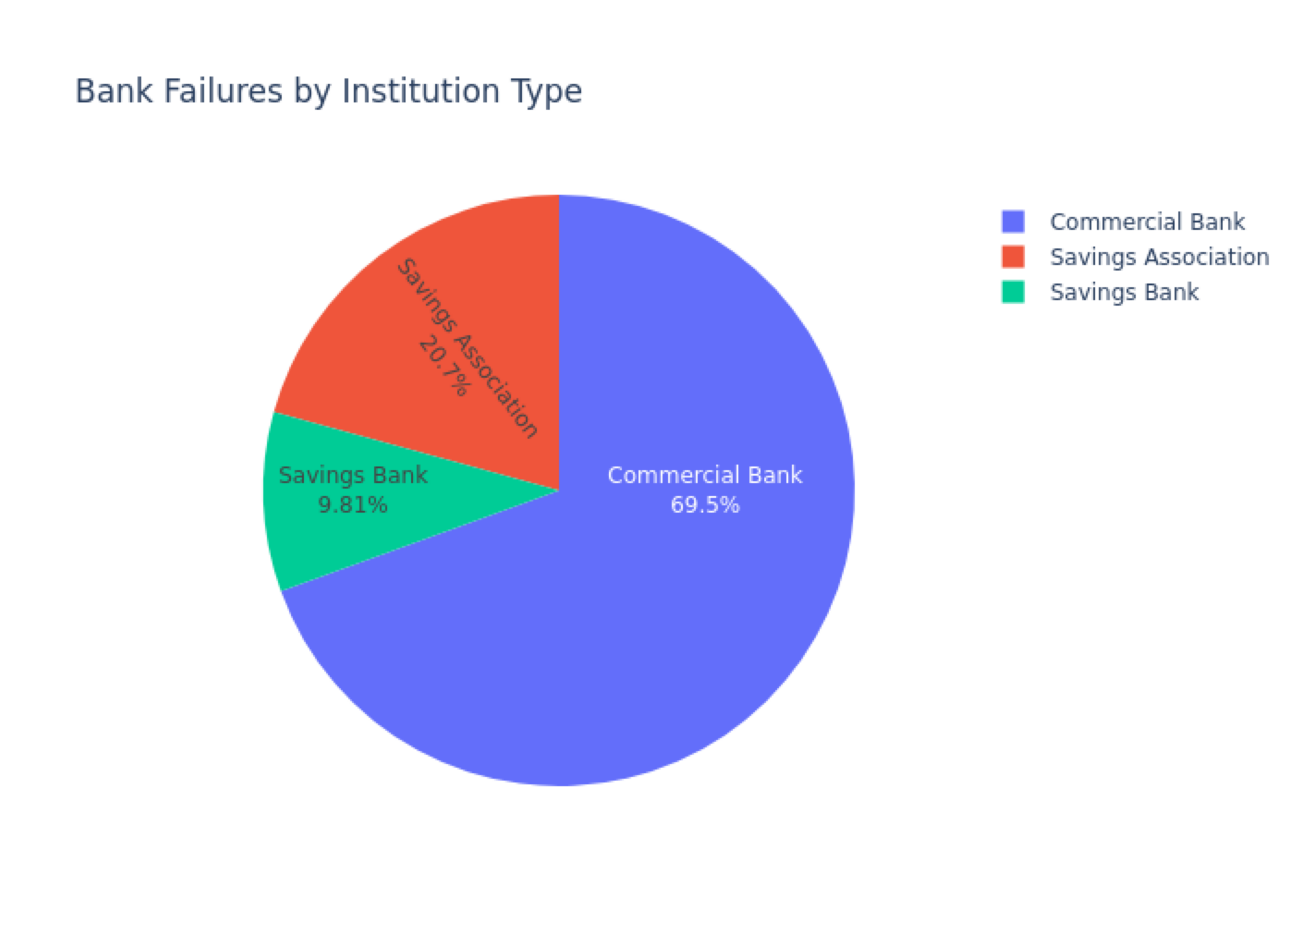

In [9]:
fig = go.Figure(data=[go.Pie(labels=bank_failures.index, values=bank_failures.values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=colors)])
fig.update_layout(title='Bank Failures by Institution Type', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

From the pie chart that commercial banks account for the vast majority (69.5%) of bank failures, indicating a higher vulnerability to operational risks compared to savings associations (20.7%) and savings banks (9.81%). 

## Temporal Analysis of Commercial Bank Failures

I focus on the subset of data where the 'Institution Type' is 'COMMERCIAL BANK'. I group the data by year and month and count the number of failures for each time period.

In [ ]:
commercial_banks = df[df['Institution Type'].str.upper() == 'COMMERCIAL BANK']
failures_by_year = commercial_banks.groupby('Year')['Institution Name'].count()
failures_by_month = commercial_banks.groupby('Month')['Institution Name'].count()

In [30]:
mdtext = "### Commercial Bank Failures by Year:\n\n"
mdtext += "| Year | Failures |\n"
mdtext += "|------|----------|\n"
for index, value in failures_by_year.items():
    mdtext += f"| {index} | {value} |\n"
display(Markdown(mdtext))

### Commercial Bank Failures by Year:

| Year | Failures |
|------|----------|
| 1934 | 9 |
| 1935 | 24 |
| 1936 | 42 |
| 1937 | 50 |
| 1938 | 49 |
| 1939 | 32 |
| 1940 | 19 |
| 1941 | 8 |
| 1942 | 6 |
| 1943 | 5 |
| 1944 | 2 |
| 1945 | 1 |
| 1946 | 1 |
| 1947 | 5 |
| 1948 | 3 |
| 1949 | 4 |
| 1950 | 4 |
| 1951 | 2 |
| 1952 | 3 |
| 1953 | 2 |
| 1954 | 2 |
| 1955 | 5 |
| 1956 | 2 |
| 1957 | 1 |
| 1958 | 4 |
| 1959 | 3 |
| 1960 | 1 |
| 1961 | 5 |
| 1963 | 2 |
| 1964 | 7 |
| 1965 | 5 |
| 1966 | 7 |
| 1967 | 4 |
| 1968 | 3 |
| 1969 | 9 |
| 1970 | 7 |
| 1971 | 6 |
| 1972 | 1 |
| 1973 | 6 |
| 1974 | 4 |
| 1975 | 12 |
| 1976 | 16 |
| 1977 | 5 |
| 1978 | 5 |
| 1979 | 10 |
| 1980 | 10 |
| 1981 | 7 |
| 1982 | 31 |
| 1983 | 43 |
| 1984 | 77 |
| 1985 | 116 |
| 1986 | 137 |
| 1987 | 183 |
| 1988 | 200 |
| 1989 | 205 |
| 1990 | 158 |
| 1991 | 105 |
| 1992 | 97 |
| 1993 | 42 |
| 1994 | 11 |
| 1995 | 6 |
| 1996 | 5 |
| 1997 | 1 |
| 1998 | 3 |
| 1999 | 7 |
| 2000 | 6 |
| 2001 | 3 |
| 2002 | 10 |
| 2003 | 2 |
| 2004 | 3 |
| 2007 | 1 |
| 2008 | 19 |
| 2009 | 120 |
| 2010 | 129 |
| 2011 | 84 |
| 2012 | 40 |
| 2013 | 23 |
| 2014 | 14 |
| 2015 | 7 |
| 2016 | 5 |
| 2017 | 2 |


In [31]:
mdtext = "### Commercial Bank Failures by Month:\n\n"
mdtext += "| Month | Failures |\n"
mdtext += "|-------|----------|\n"
for index, value in failures_by_month.items():
    mdtext += f"| {index} | {value} |\n"
display(Markdown(mdtext))

### Commercial Bank Failures by Month:

| Month | Failures |
|-------|----------|
| 1 | 183 |
| 2 | 171 |
| 3 | 224 |
| 4 | 199 |
| 5 | 211 |
| 6 | 201 |
| 7 | 273 |
| 8 | 175 |
| 9 | 161 |
| 10 | 215 |
| 11 | 137 |
| 12 | 165 |


I create interactive line plots using Plotly. These plots allow for a clear understanding of the temporal patterns and any significant peaks or troughs in the failure rates.

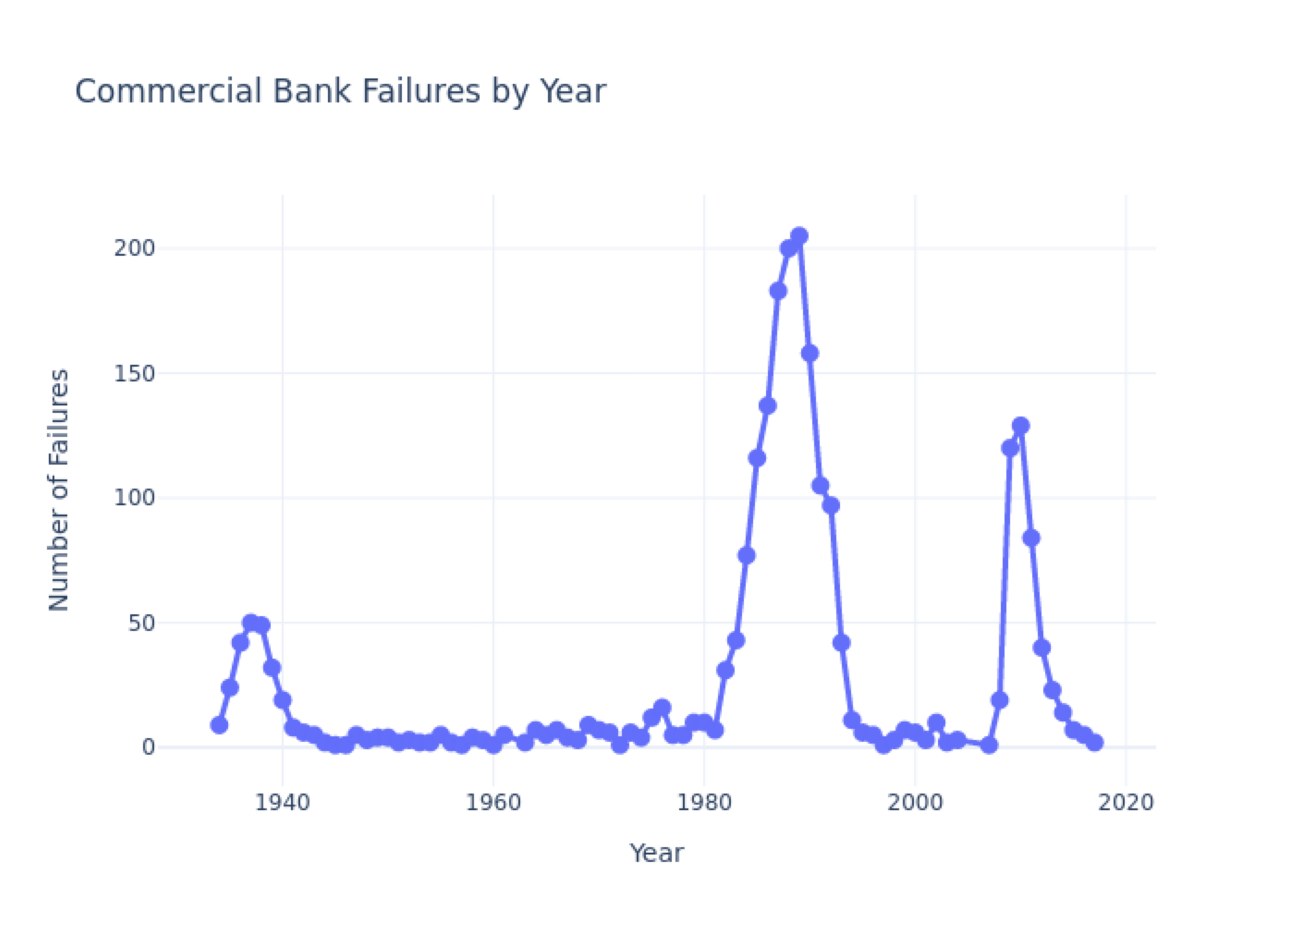

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=failures_by_year.index, y=failures_by_year.values, mode='lines+markers', name='Yearly Trend',
                         line=dict(color=colors[0], width=3), marker=dict(size=10, color=colors[0], symbol='circle')))
fig.update_layout(title='Commercial Bank Failures by Year', xaxis_title='Year', yaxis_title='Number of Failures', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

In the number of commercial bank failures over time, with notable peaks in the late 1930s, late 1980s to early 1990s, and late 2000s. These periods of heightened operational risk may be linked to economic downturns or systemic financial issues. 

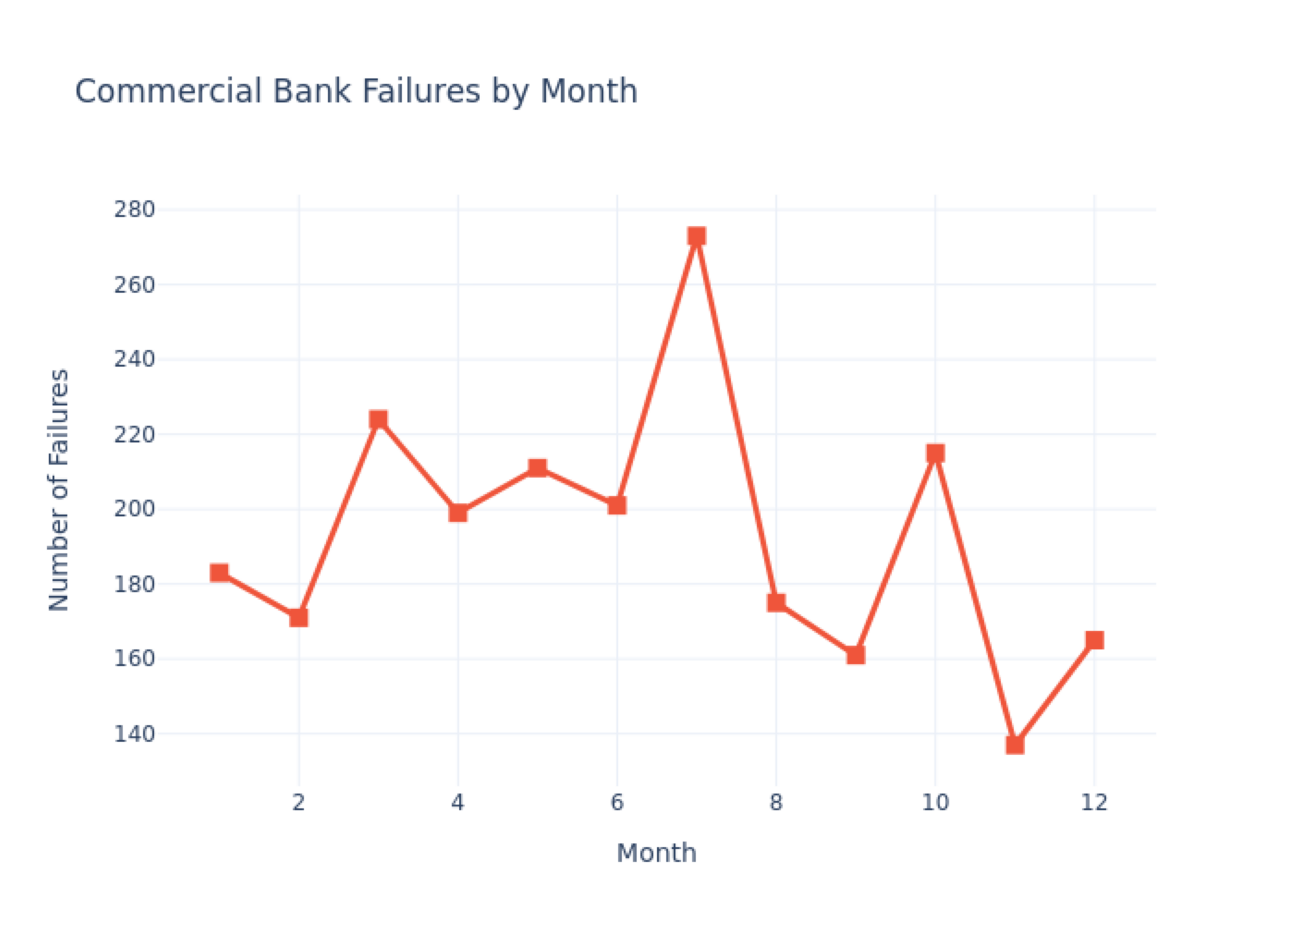

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=failures_by_month.index, y=failures_by_month.values, mode='lines+markers', name='Monthly Trend',
                         line=dict(color=colors[1], width=3), marker=dict(size=10, color=colors[1], symbol='square')))
fig.update_layout(title='Commercial Bank Failures by Month', xaxis_title='Month', yaxis_title='Number of Failures', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

Commercial bank failures exhibit a monthly pattern, with the highest number of failures occurring in March and July, and the lowest in August and November. 

## Geographical Analysis of Commercial Bank Failures

I group the data by state and count the number of failures in each state. I sort the states in descending order based on the number of failures and present the results in a tabular format.

In [ ]:
failures_by_state = commercial_banks.groupby('State')['Institution Name'].count().sort_values(ascending=False)

In [32]:
mdtext = "### Commercial Bank Failures by State:\n\n"
mdtext += "| State | Failures |\n"
mdtext += "|-------|----------|\n"
for index, value in failures_by_state.items():
    mdtext += f"| {index} | {value} |\n"
display(Markdown(mdtext))

### Commercial Bank Failures by State:

| State | Failures |
|-------|----------|
| Tx | 581 |
| Ok | 133 |
| Ca | 133 |
| Fl | 108 |
| Il | 107 |
| Ga | 105 |
| Mo | 95 |
| Ks | 79 |
| Co | 77 |
| La | 76 |
| Mn | 63 |
| Tn | 51 |
| Ia | 49 |
| Ne | 43 |
| Wi | 34 |
| Nj | 33 |
| Az | 33 |
| Sd | 29 |
| In | 29 |
| Ky | 28 |
| Ct | 28 |
| Nd | 27 |
| Ny | 26 |
| Mi | 25 |
| Wy | 22 |
| Ma | 22 |
| Pa | 22 |
| Ar | 22 |
| Or | 22 |
| Al | 20 |
| Wa | 20 |
| Ut | 18 |
| Va | 16 |
| Mt | 14 |
| Nm | 13 |
| Oh | 13 |
| Nv | 12 |
| Sc | 11 |
| Ms | 11 |
| Nc | 11 |
| Nh | 10 |
| Md | 9 |
| Wv | 9 |
| Ak | 6 |
| Dc | 5 |
| Id | 4 |
| Hi | 4 |
| Vt | 3 |
| Me | 2 |
| Ri | 1 |
| De | 1 |


I create interactive bar charts and pie charts using Plotly. These visualizations provide a clear understanding of the states that have been most affected by bank failures.

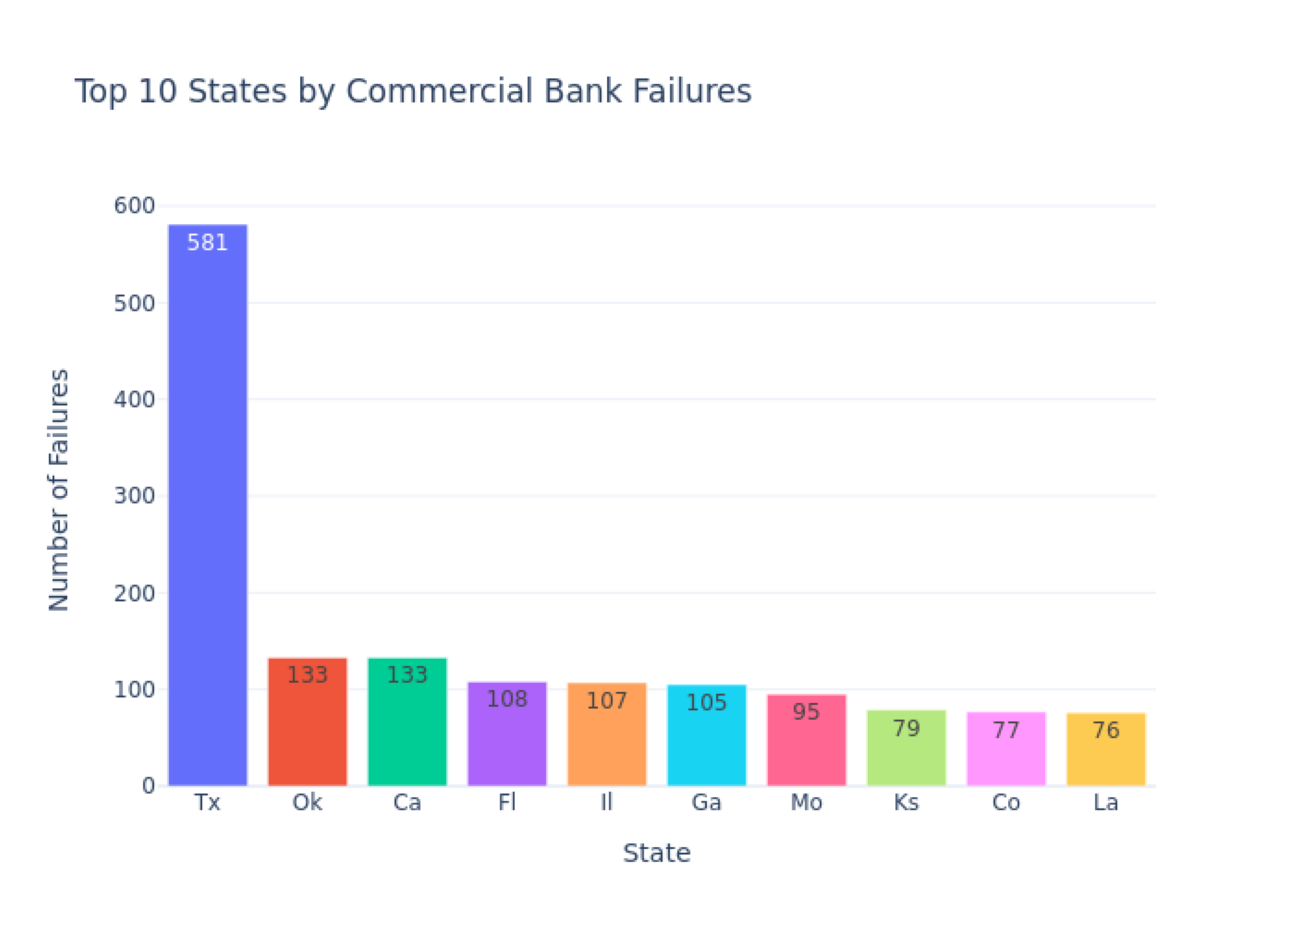

In [15]:
fig = go.Figure(data=[go.Bar(x=failures_by_state.head(10).index, y=failures_by_state.head(10).values,
                             text=failures_by_state.head(10).values, textposition='auto', marker_color=colors)])
fig.update_layout(title='Top 10 States by Commercial Bank Failures', xaxis_title='State', yaxis_title='Number of Failures', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

In commercial bank failures, with Texas leading the top 10 states, followed by Oklahoma, California, and others. 

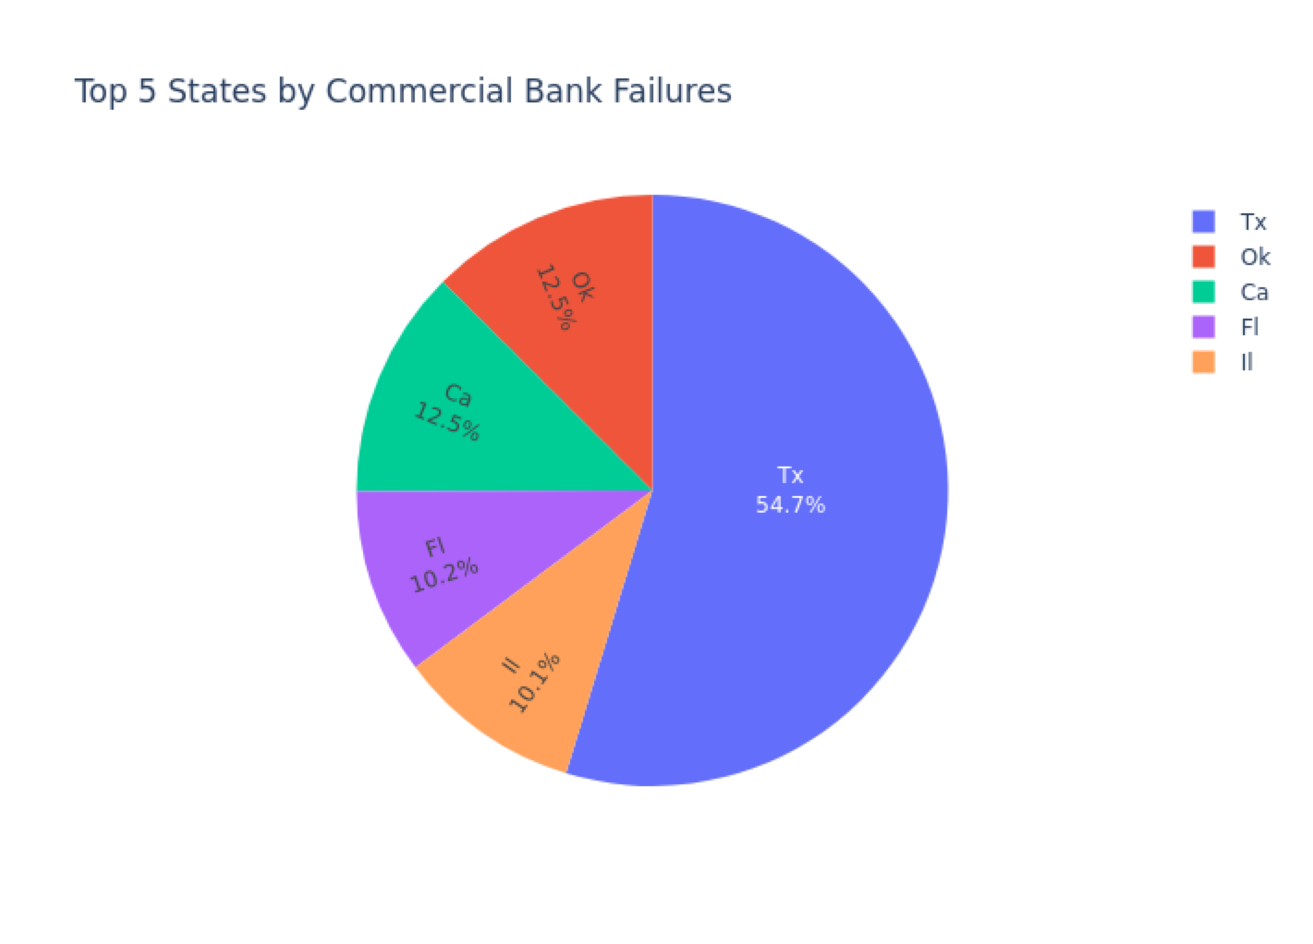

In [16]:
fig = go.Figure(data=[go.Pie(labels=failures_by_state.head(5).index, values=failures_by_state.head(5).values,
                             textinfo='label+percent', insidetextorientation='radial', marker_colors=colors)])
fig.update_layout(title='Top 5 States by Commercial Bank Failures', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

The top 5 states, led by Texas, account for a substantial portion of commercial bank failures. This concentration of failures in specific states underscores the importance of understanding regional factors and developing targeted risk management strategies. 

## Scale Analysis of Failed Commercial Banks

I create interactive histograms using Plotly to visualize the distribution of total assets and total deposits.

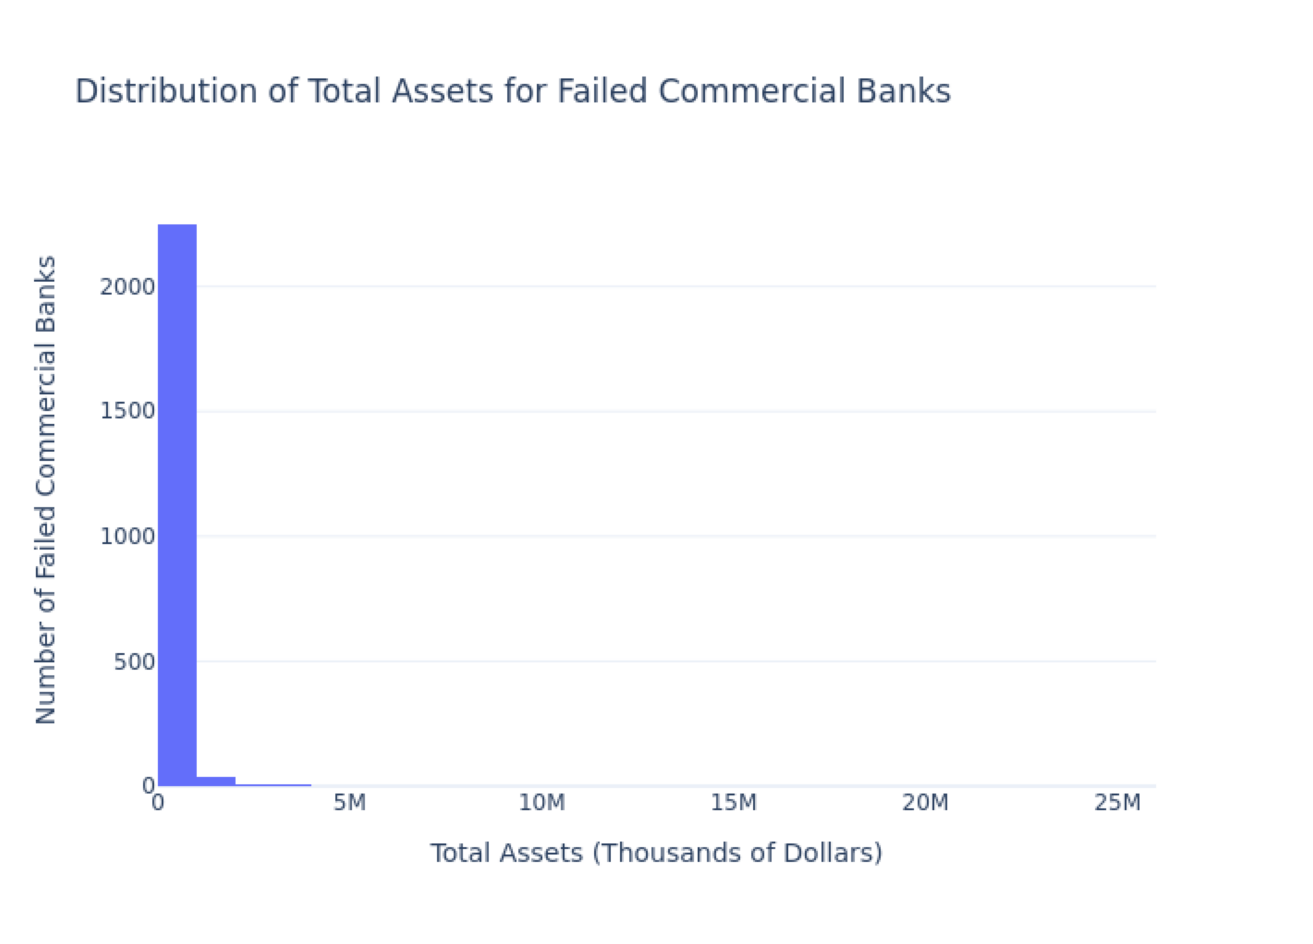

In [17]:
fig = go.Figure(data=[go.Histogram(x=commercial_banks['Total Assets'], nbinsx=30, marker_color=colors[0])])
fig.update_layout(title='Distribution of Total Assets for Failed Commercial Banks',
                  xaxis_title='Total Assets (Thousands of Dollars)', yaxis_title='Number of Failed Commercial Banks', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

A highly skewed distribution of total assets among failed commercial banks, with the majority having assets below $5 million. I recognize that this concentration of failures among smaller banks highlights their financial vulnerabilities and operational risks. 

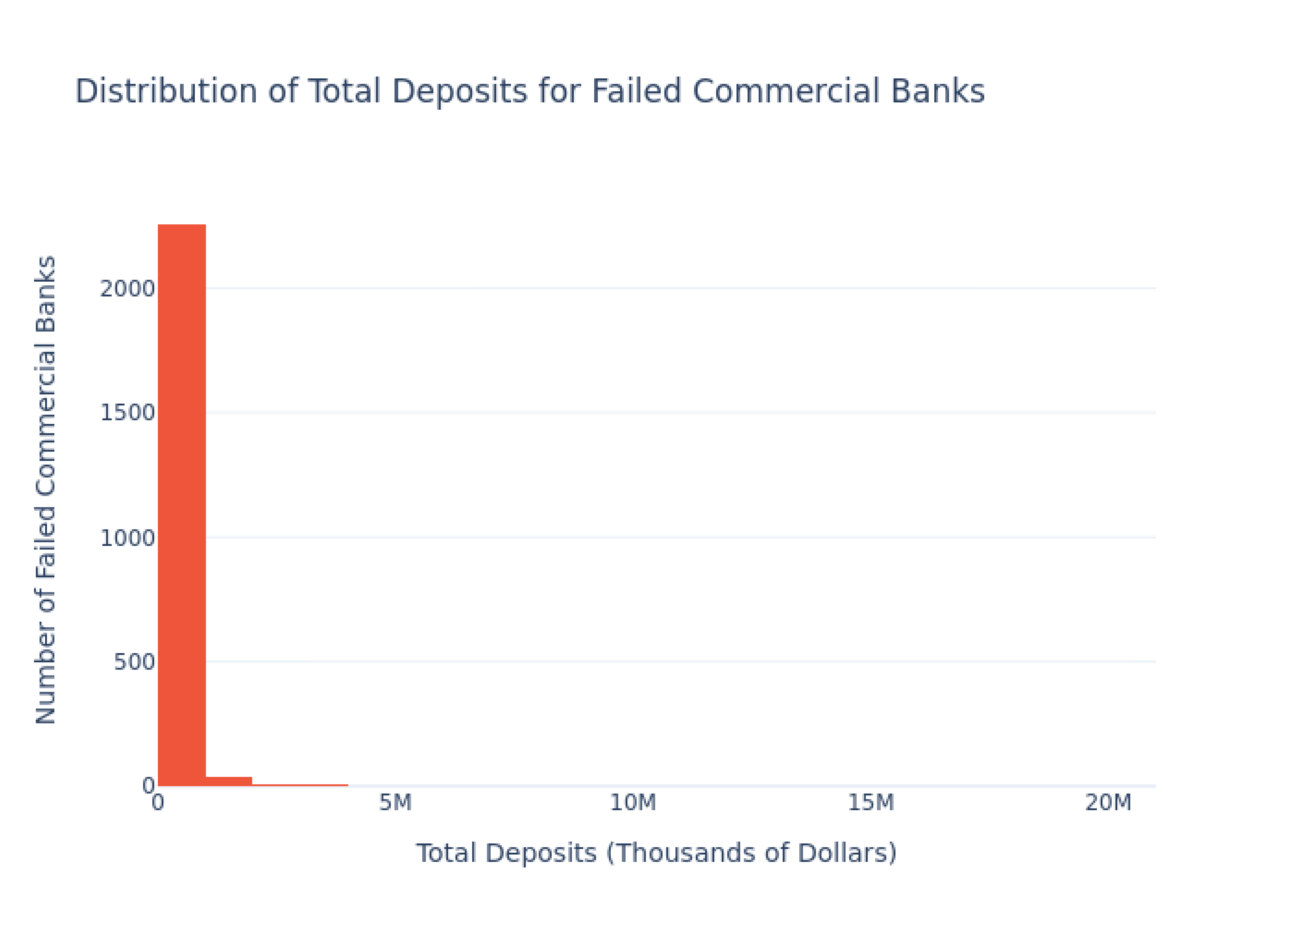

In [18]:
fig = go.Figure(data=[go.Histogram(x=commercial_banks['Total Deposits'], nbinsx=30, marker_color=colors[1])])
fig.update_layout(title='Distribution of Total Deposits for Failed Commercial Banks',
                  xaxis_title='Total Deposits (Thousands of Dollars)', yaxis_title='Number of Failed Commercial Banks', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

A similar skewed distribution in the total deposits of failed commercial banks, with most having deposits below $5 million. 

## Financial Indicator Analysis of Failed Commercial Banks

I create interactive histograms using Plotly to visualize the distribution of the loan-to-deposit ratio and asset utilization rate.

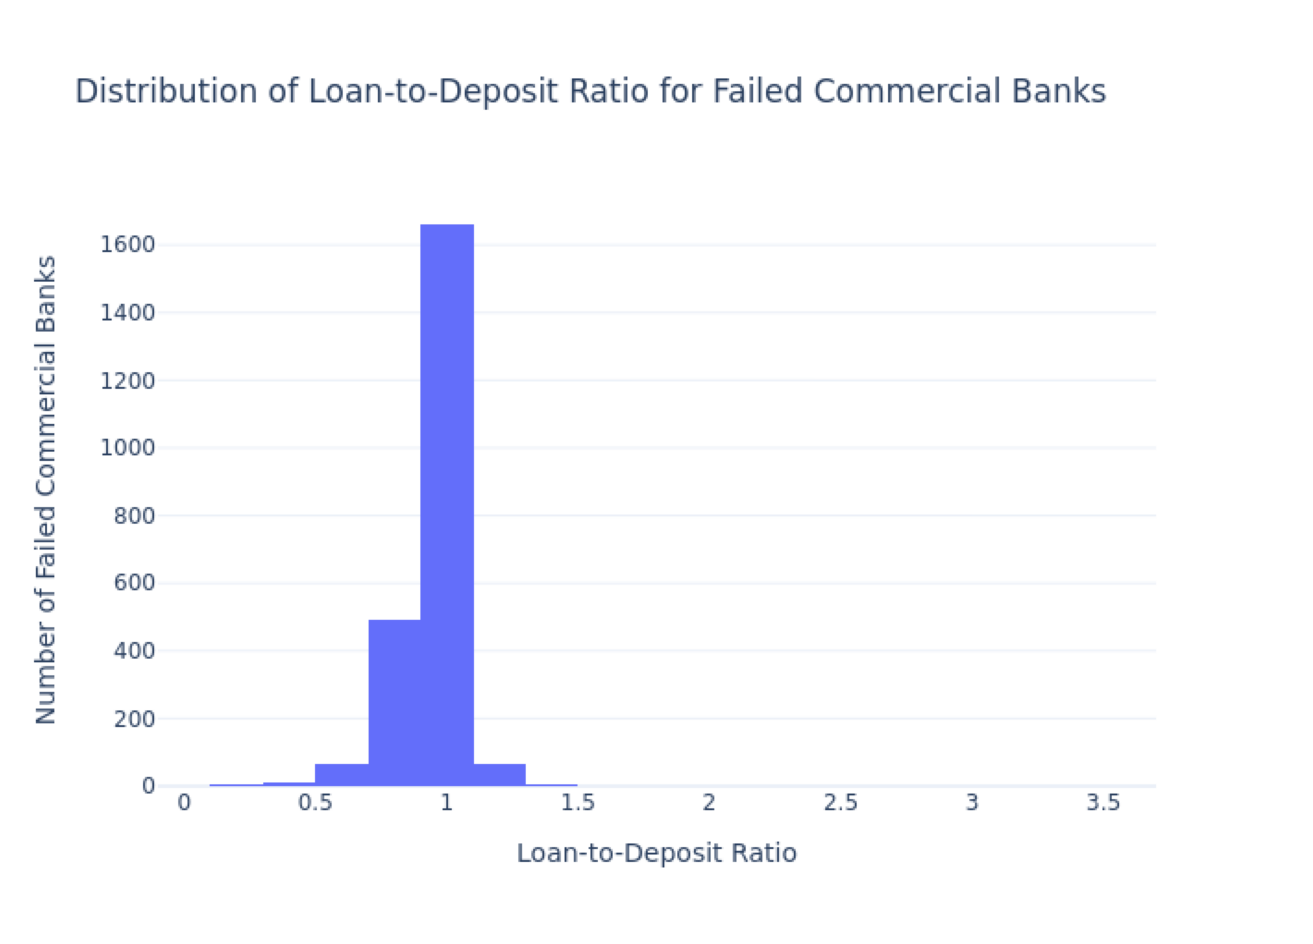

In [19]:
fig = go.Figure(data=[go.Histogram(x=commercial_banks['Loan-to-Deposit Ratio'], nbinsx=30, marker_color=colors[0])])
fig.update_layout(title='Distribution of Loan-to-Deposit Ratio for Failed Commercial Banks',
                  xaxis_title='Loan-to-Deposit Ratio', yaxis_title='Number of Failed Commercial Banks', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

The majority of failed commercial banks have a loan-to-deposit ratio around 1.0, indicating a high reliance on loans compared to deposits. 

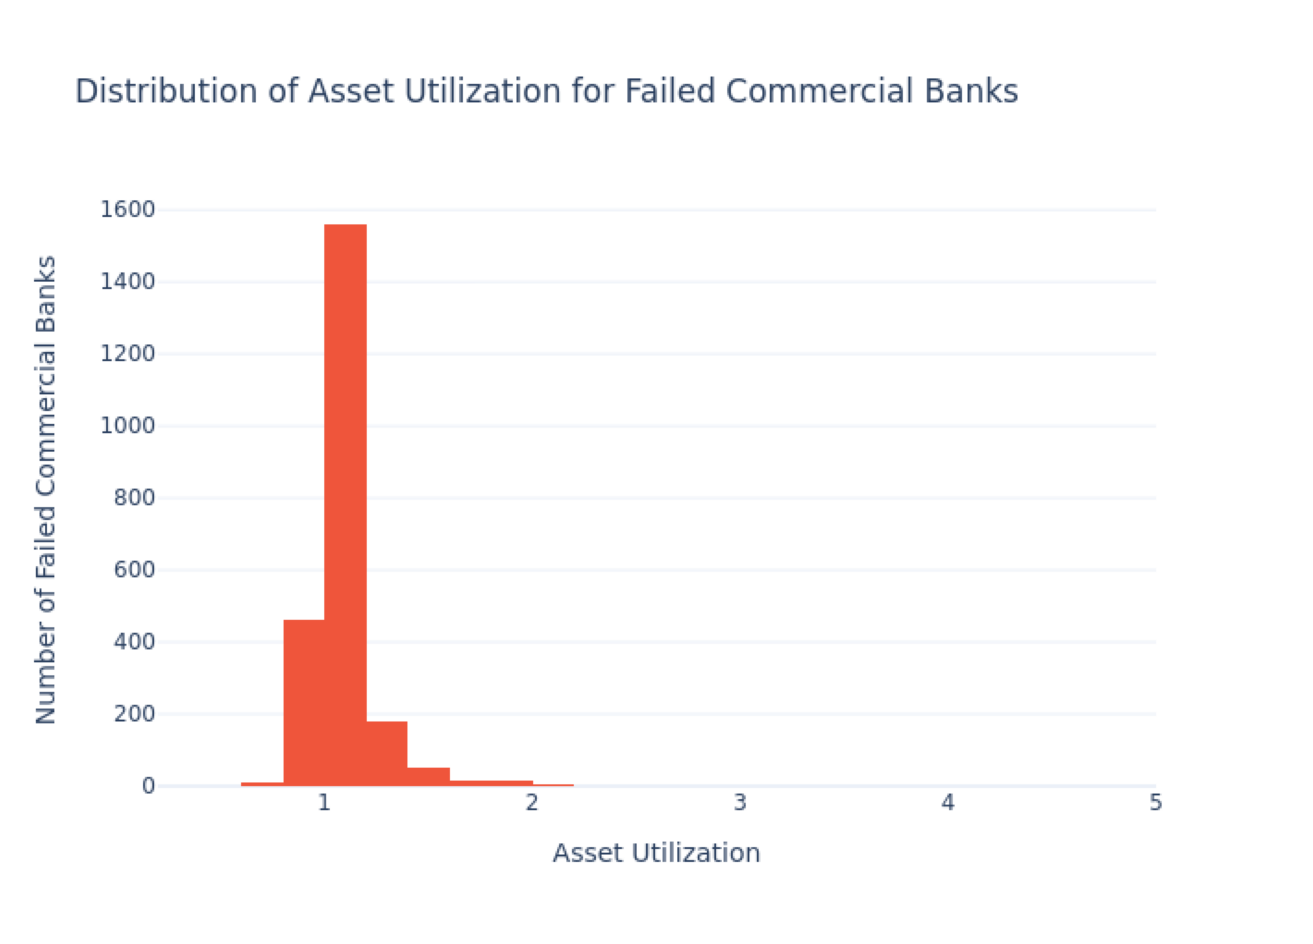

In [20]:
fig = go.Figure(data=[go.Histogram(x=commercial_banks['Asset Utilization'], nbinsx=30, marker_color=colors[1])])
fig.update_layout(title='Distribution of Asset Utilization for Failed Commercial Banks',
                  xaxis_title='Asset Utilization', yaxis_title='Number of Failed Commercial Banks', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

From the bar chart that most failed commercial banks have an asset utilization ratio around 1.0, suggesting that their assets were fully utilized relative to deposits. 

I create an interactive scatter plot using Plotly. The scatter plot uses the total assets as the color scale.

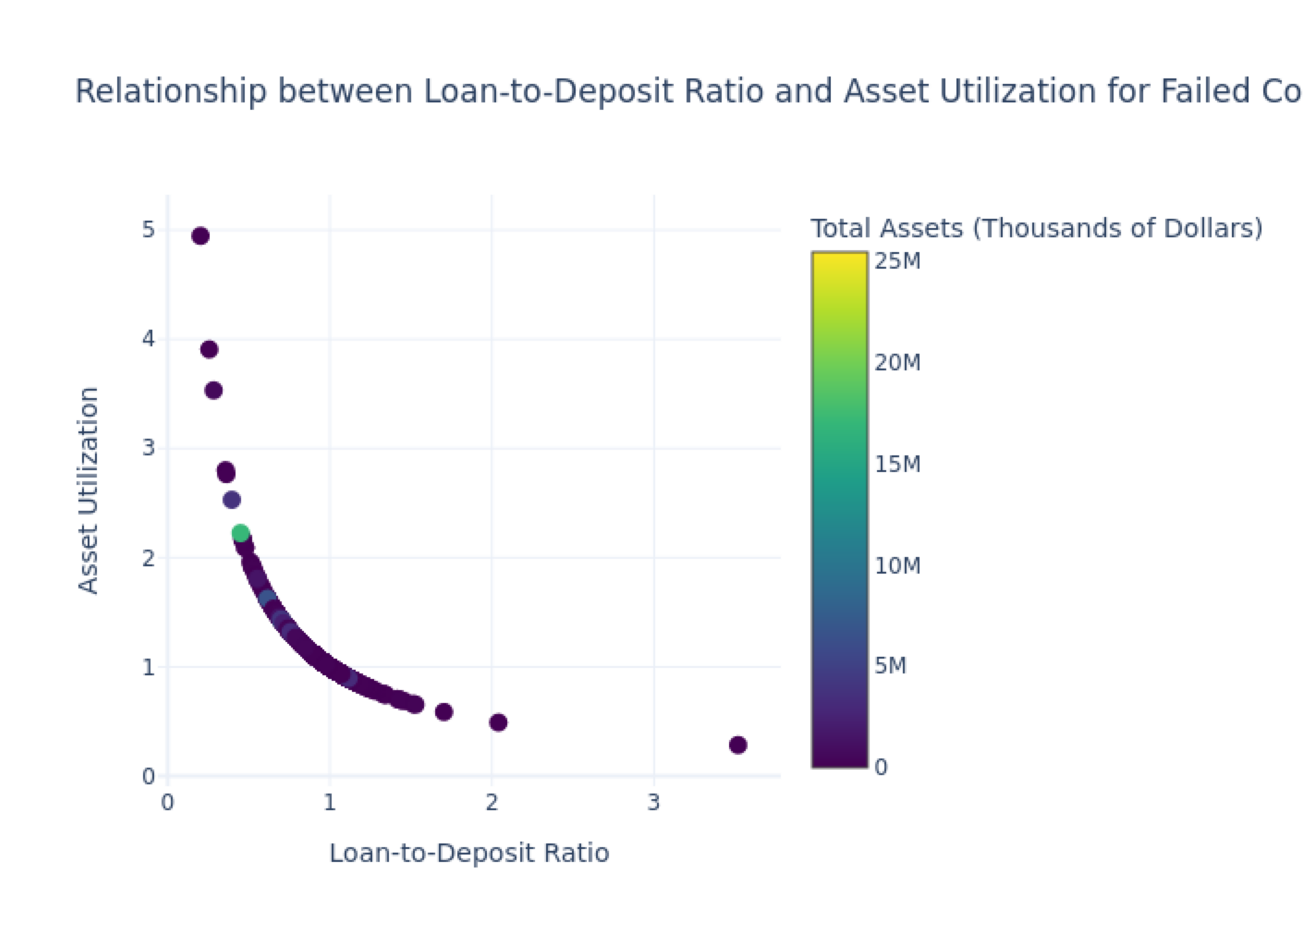

In [21]:
commercial_banks = commercial_banks[(commercial_banks['Loan-to-Deposit Ratio'] != np.inf) & (commercial_banks['Loan-to-Deposit Ratio'] != -np.inf)]
commercial_banks = commercial_banks[(commercial_banks['Asset Utilization'] != np.inf) & (commercial_banks['Asset Utilization'] != -np.inf)]
commercial_banks = commercial_banks.dropna(subset=['Loan-to-Deposit Ratio', 'Asset Utilization'])

fig = go.Figure(data=go.Scatter(x=commercial_banks['Loan-to-Deposit Ratio'], y=commercial_banks['Asset Utilization'], mode='markers',
                                marker=dict(size=10, color=commercial_banks['Total Assets'], colorscale='Viridis', showscale=True,
                                            colorbar=dict(title='Total Assets (Thousands of Dollars)'))))
fig.update_layout(title='Relationship between Loan-to-Deposit Ratio and Asset Utilization for Failed Commercial Banks',
                  xaxis_title='Loan-to-Deposit Ratio', yaxis_title='Asset Utilization', template=template)
img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

The scatter plot reveals an inverse relationship between the loan-to-deposit ratio and asset utilization for failed commercial banks, with most banks clustering around a loan-to-deposit ratio of 1.0 and an asset utilization near 1.0 to 2.0. 

I calculate the Pearson correlation coefficient and its corresponding p-value using the `stats.pearsonr()` function from the SciPy library.

In [24]:
import scipy.stats as stats
corr_loan_to_deposit_asset_util, p_value_loan_to_deposit_asset_util = stats.pearsonr(commercial_banks['Loan-to-Deposit Ratio'], commercial_banks['Asset Utilization'])
mdtext = f"""
### Correlation Analysis

**Correlation between Loan-to-Deposit Ratio and Asset Utilization:**

- **Correlation Coefficient:** {corr_loan_to_deposit_asset_util:.2f}
- **p-value:** {p_value_loan_to_deposit_asset_util:.4f}
"""
display(Markdown(mdtext))


### Correlation Analysis

**Correlation between Loan-to-Deposit Ratio and Asset Utilization:**

- **Correlation Coefficient:** -0.82
- **p-value:** 0.0000


I create an interactive choropleth map of the United States using Plotly. The map visualizes the number of failures in each state, with darker shades indicating a higher number of failures.

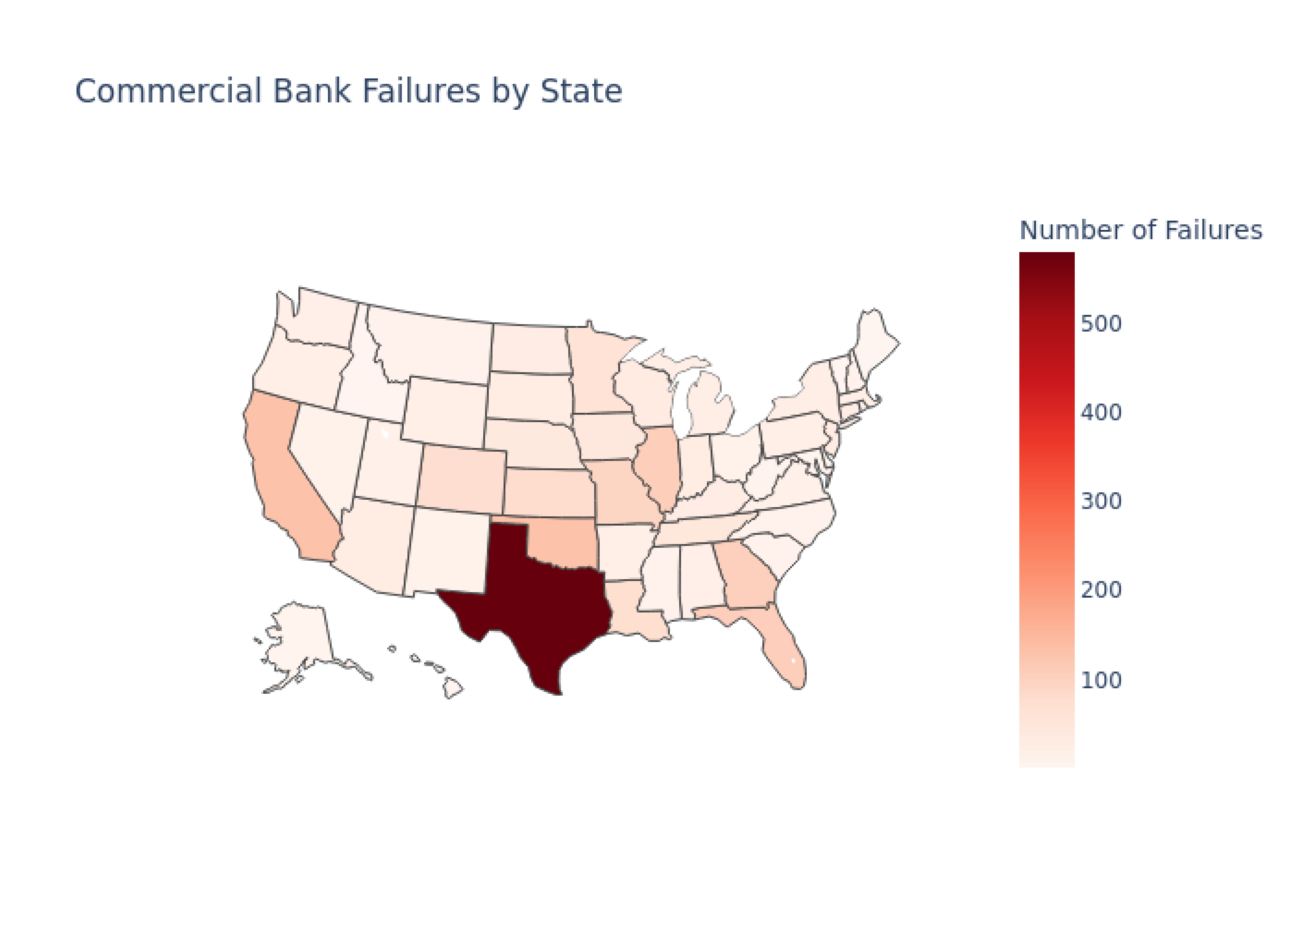

In [33]:
df = pd.read_csv('banks.csv')
df = df.dropna(subset=['Total Deposits', 'Total Assets', 'Headquarters'])
df['Failure Date'] = pd.to_datetime(df['Failure Date'], errors='coerce')
df['Year'] = df['Failure Date'].dt.year
df['Month'] = df['Failure Date'].dt.month
df['State'] = df['Headquarters'].str.extract(r', (\w+)$')
commercial_banks = df[df['Institution Type'].str.upper() == 'COMMERCIAL BANK']
failures_by_state = commercial_banks.groupby('State')['Institution Name'].count().sort_values(ascending=False)
failures_by_state = failures_by_state.astype(float)
fig = go.Figure(data=go.Choropleth(
    locations=failures_by_state.index,
    z=failures_by_state.values,
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Number of Failures'
))

fig.update_layout(
    title='Commercial Bank Failures by State',
    geo_scope='usa',  
    template=template
)

img_bytes = pio.to_image(fig, format='png')
img = Image.open(BytesIO(img_bytes))
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

The map highlights the regional patterns and concentrations of commercial bank failures across the United States, with Texas having the highest number of failures, followed by Oklahoma, California, and Florida. 